In [ ]:
# requirements
%pip install pandas matplotlib catppuccin

In [2]:
from typing import Literal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import catppuccin


In [3]:
palette_main = list(catppuccin.PALETTE.latte.colors)[:14]
palette_light = list(catppuccin.PALETTE.mocha.colors)[:14]

In [4]:
# Configuration before running the cells
NAME = 'test'                                                        # Filename without extension, e.g. 'test' for 'test.tsv'
SORT: Literal['name', 'credit', 'score', 'earned', 'loss'] = 'loss'  # Column to sort by, e.g. 'loss' for sorting by the loss column
SHOW: Literal['credit', 'score'] = 'score'                           # Column to show, e.g. 'score' for showing the score column

In [5]:
df = pd.read_csv(f'{NAME}.tsv', sep='\t')
df['earned'] = df['score'] / 100 * df['credit']
df['loss'] = df['credit'] - df['earned']
df = df.sort_values(by=SORT, ascending=False).reset_index(drop=True)

total = np.sum(df['credit'])
mean = np.sum(df['earned']) / total
title = f'{NAME} | Mean: {mean*100:.2f} | Sorted by {SORT} | Showing {SHOW}'

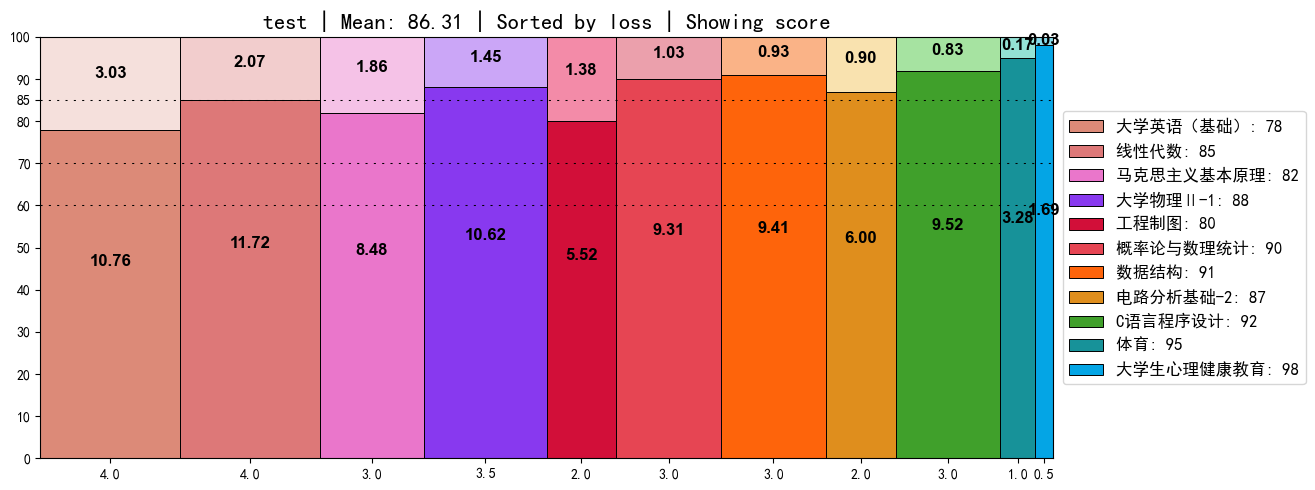

In [6]:
plt.style.use('default')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(16, 5))

bar_handles = []
legend_labels = []

left = 0

for row in df.itertuples(index=True):
    i:      int   = row.Index                # type: ignore
    name:   str   = row.name                 # type: ignore
    credit: float = row.credit               # type: ignore
    score:  float = row.score                # type: ignore
    earned: float = row.earned               # type: ignore
    loss:   float = row.loss                 # type: ignore

    main_color_rgb = palette_main[i % len(palette_main)].rgb
    main_color = (main_color_rgb.r/255, main_color_rgb.g/255, main_color_rgb.b/255)
    light_color = palette_light[i % len(palette_light)].rgb
    light_color = (light_color.r/255, light_color.g/255, light_color.b/255)

    handle = ax.bar(left, score, width=credit, color=main_color, edgecolor='black', linewidth=0.7, align='edge')
    ax.bar(left, 100 - score, width=credit, bottom=score, color=light_color, edgecolor='black', linewidth=0.7, align='edge')

    bar_handles.append(handle[0])
    legend_labels.append(f"{name}: {score}")

    x = left + credit / 2
    y = score * 0.6

    if SHOW == 'credit':
        maintext = f"{earned:.2f}"
        subtext = f"{loss:.2f}"
    elif SHOW == 'score':
        maintext = f"{earned*100/total:.2f}"
        subtext = f"{loss*100/total:.2f}"

    ax.text(x, y, maintext, ha='center', va='center',
            fontsize=12, fontweight='bold', color='black', fontname='Arial')

    if score < 100:
        y2 = score + (100 - score) * 0.6
        ax.text(x, y2, subtext, ha='center', va='center',
                fontsize=12, fontweight='bold', color='black', fontname='Arial')

    left += credit

midpoints = np.cumsum([0] + df['credit'].to_list())[:-1] + np.array(df['credit']) / 2
ax.set_ylim(0, 100)
ax.set_xticks(midpoints)
ax.set_xticklabels([f"{credit:.1f}" for credit in df['credit']])
yticks = set(range(0, 101, 10))
yticks |= {85, 70, 60}
yticks = sorted(yticks)
ax.set_yticks(yticks)

for y_val in [85, 70, 60]:
    ax.axhline(y=y_val, color='black', linestyle=(0, (2, 6)), linewidth=0.75)

ax.margins(x=0)

ax.set_title(title, fontsize=16, fontweight='bold', loc='center')

ax.legend(bar_handles, legend_labels, fontsize=12, title_fontsize=13,
          loc="center left", bbox_to_anchor=(1.01, 0.5), borderaxespad=0)

plt.tight_layout(rect=(0, 0, 0.83, 1))
plt.savefig(f'{NAME}.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
df